import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [83]:
data=pd.read_csv("E:\Python\PracticleData\examdata.txt",names=['exam1','exam2','admitted'])

In [84]:
positive=data[data['admitted'].isin([1])]
negative=data[data['admitted'].isin([0])]

In [85]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [86]:
def computeCost(X,y,theta):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y) 
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)
    

In [87]:
data.insert(0,'ones',1)
X=data.iloc[:,0:3]
y=data.iloc[:,3:4]

In [88]:
theta=np.zeros((1,3))
type(X),type(y),type(theta)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame, numpy.ndarray)

In [89]:
c=computeCost(X,y,theta)

In [90]:
c

0.6931471805599453

In [91]:
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(theta)

In [92]:
def gradientDescent(X,y,theta,alpha, iterations,lam):
    temp = np.matrix(np.zeros((1,3)))
    parameters = 3  #theta0,theta1,theta2
    cost = np.zeros(iterations) #error of every iteration
    for i in range(iterations):
        error = sigmoid(X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j]) 
            temp[0,j] = theta[0,j]*(1-((alpha*lam)/len(X))) - (alpha* np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta) 
    return theta,cost

In [93]:
a,b=gradientDescent(X,y,theta,0.00001,1000000,1)

In [94]:
b[-1]

0.22830368869433257

In [95]:
h=sigmoid(X*a.T)


In [96]:
for i in range(len(h)):
    if h[i]>0.5:
        h[i]=1
    else:
        h[i]=0

In [97]:
count=0
for i in range(len(y)):
    if y[i]==h[i]:
        count+=1

In [98]:
accuracy=(count*100)/len(X)

In [99]:
accuracy

89.0

In [100]:
l1=[]
l2=[]
x1=np.linspace(data.exam1.min(),data.exam1.max(),500)
x2=np.linspace(data.exam2.min(),data.exam2.max(),500)
for i in x1:
    for j in x2:
        d = sigmoid(a[0,0]+a[0,1]*i+a[0,2]*j)
        if d>0.49 and d< 0.51:
            l1.append(i)
            l2.append(j)
                


Text(0, 0.5, 'Exam2 score')

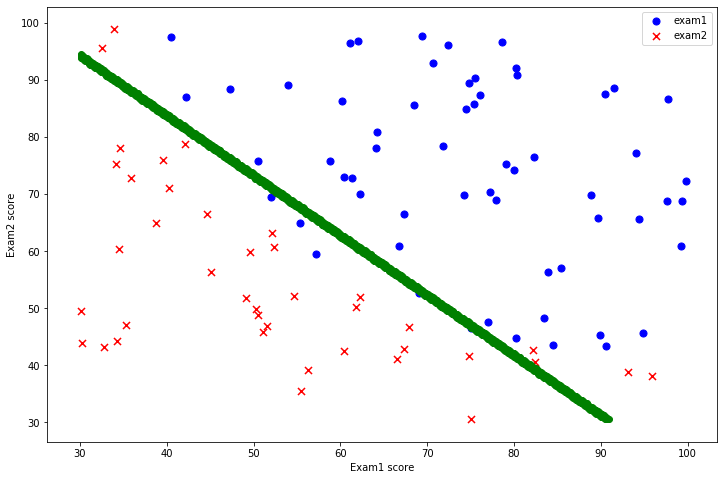

In [101]:
fig,ax = plt.subplots(figsize=(12,8))                          
ax.scatter(positive['exam1'],positive['exam2'],c='b',marker='o',s=50,label='exam1')  
ax.scatter(negative['exam1'],negative['exam2'],c='r',marker='x',s=50,label='exam2')
ax.legend()
ax.scatter(l1,l2,c='g')
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')